<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'><strong>EABL STOCK PRICE PREDICTION </strong></span></b> </div> 

### <b> <span style='color:#16C2D5'>|</span> Business Objectives</b>
1. Build a robust time series model leveraging market indicators to forecast future EABL stock prices. 
2. Investigate viability of investing in EABL stock prices. 
3. Build an anomally detection system to identify unusual or unexpected patterns in EABL stock prices. 

In [1]:
import pandas as pd 
import numpy as np
 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [2]:
import pandas as pd
df = pd.read_csv('Data/EABL-2006-2024_JAN_STOCKS.csv')
df.head()

,Date,Open,High,Low,Close,Average,Volume
0,2024-01-31,104.00,111.00,104.0,110.0,106.00,42000
1,2024-01-30,105.00,105.00,101.0,104.0,104.00,15600
2,2024-01-29,105.00,105.00,99.0,103.5,100.00,596100
3,2024-01-26,116.25,116.25,100.0,100.0,104.50,60500
4,2024-01-25,119.75,120.00,118.0,118.0,118.25,5700


In [3]:
####
# Display the column names in your DataFrame
print(df.columns)

Index(['Date ', 'Open', 'High', 'Low', 'Close', 'Average', 'Volume'], dtype='object')


In [4]:
####
# Remove extra space from the 'Date ' column name
df.columns = df.columns.str.strip()

# Convert 'Date' column to datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Display the updated dataset
print(df.head())

              Open    High    Low  Close  Average  Volume
Date                                                     
2024-01-31  104.00  111.00  104.0  110.0   106.00   42000
2024-01-30  105.00  105.00  101.0  104.0   104.00   15600
2024-01-29  105.00  105.00   99.0  103.5   100.00  596100
2024-01-26  116.25  116.25  100.0  100.0   104.50   60500
2024-01-25  119.75  120.00  118.0  118.0   118.25    5700


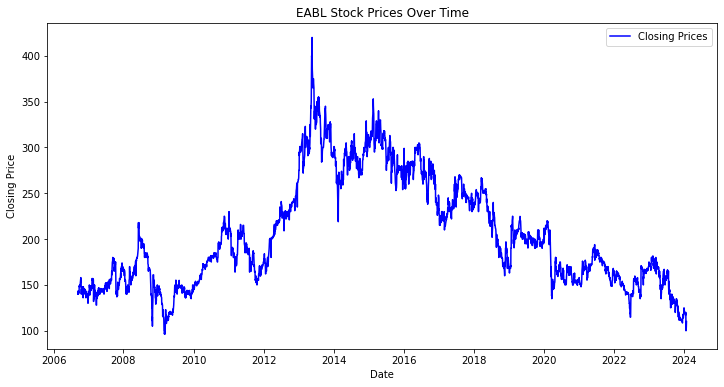

In [5]:
####
# Plotting the closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Prices', color='blue')
plt.title('EABL Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [6]:
####
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test and print results
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')

# Perform ADF test on closing prices
adf_test(df['Close'])

ADF Statistic: -1.9536773708783506
p-value: 0.30724573554645646
Critical Values: {'1%': -3.4318713222755868, '5%': -2.8622122358955395, '10%': -2.5671278361087952}


In [7]:
# The p-value is greater than the significance level of 0.05. This suggests that we fail to reject the null hypothesis, and the data may not be stationary.

In [8]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Display the missing values
print(missing_values)

Open       0
High       0
Low        0
Close      0
Average    0
Volume     0
dtype: int64


In [9]:
###
# To make the time series stationary, we can perform differencing then run the ADF test again
# Perform differencing on closing prices
df['Close_diff'] = df['Close'].diff()

# Drop any rows with NaN values created by differencing
df.dropna(inplace=True)

# Run ADF test on differenced data
adf_test(df['Close_diff'])

ADF Statistic: -18.64474644367863
p-value: 2.0528200418911278e-30
Critical Values: {'1%': -3.4318713222755868, '5%': -2.8622122358955395, '10%': -2.5671278361087952}


In [10]:
# The significantly low p-value suggests that we can reject the null hypothesis, indicating that the differenced data is now stationary.

# Now, we can proceed with building the ARIMA model. By determining the order of the ARIMA model using the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

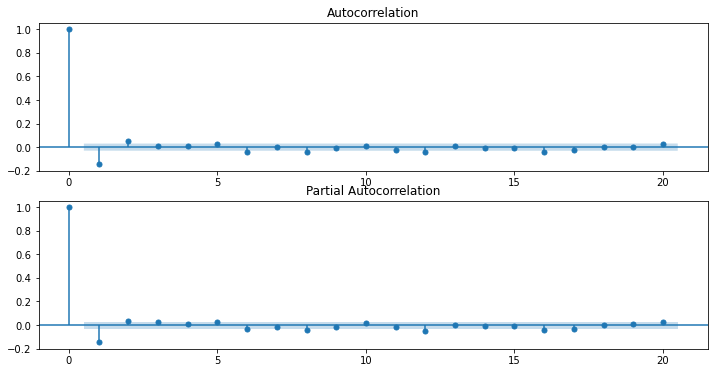

In [11]:
###
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(2, 1, 1)
plot_acf(df['Close_diff'], lags=20, ax=plt.gca())

# PACF plot
plt.subplot(2, 1, 2)
plot_pacf(df['Close_diff'], lags=20, ax=plt.gca())

plt.show()

In [12]:
###
'''
From the ACF (Autocorrelation Function) Plot we see a gradual decrease, indicating that differencing has been effective

From PACF (Partial Autocorrelation Function) Plot we see that there's a significant drop after lag 1 indicating that an AR order of 1 might be suitable

Based on these plots we can start with an ARIMA(1,1,0) model This means an AutoRegressive order of 1 a Differencing order of 1 and a Moving Average order 
of 0.
'''


"\nFrom the ACF (Autocorrelation Function) Plot we see a gradual decrease, indicating that differencing has been effective\n\nFrom PACF (Partial Autocorrelation Function) Plot we see that there's a significant drop after lag 1 indicating that an AR order of 1 might be suitable\n\nBased on these plots we can start with an ARIMA(1,1,0) model This means an AutoRegressive order of 1 a Differencing order of 1 and a Moving Average order \nof 0.\n"

In [13]:
###
# fitting the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['Close'], order=(1,1,0))
results = model.fit()

# Display model summary
print(results.summary())

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4318
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -12521.406
Date:                Sat, 03 Feb 2024   AIC                          25046.811
Time:                        20:56:19   BIC                          25059.552
Sample:                             0   HQIC                         25051.310
                               - 4318                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1446      0.009    -15.886      0.000      -0.162      -0.127
sigma2        19.3613      0.207     93.329      0.000      18.955      19.768
Ljung-Box (L1) (Q):                   0.10   Jarque-

In [14]:
###
'''
Coefficients:

The coefficient for the AR(1) term (ar.L1) is approximately -0.1446.
The coefficient represents the strength and direction of the autoregressive relationship. In this case, it's negative, indicating a negative correlation with the previous observation.
Standard Error (std err):

The standard error associated with the AR(1) term is approximately 0.009.
p-value:

The p-value for the AR(1) term is very close to zero (significant), suggesting that the AR(1) term is statistically significant in predicting the next observation.
Log Likelihood, AIC, BIC, HQIC:

These values provide information about the goodness of fit of the model. Lower AIC, BIC, and HQIC values are generally better. In this case, the values are quite high, indicating that the model may not be the best fit.
Ljung-Box (Q) Statistic:

The Ljung-Box test is a test for the absence of serial correlation of residuals. In this case, the Q statistic is 0.10 with a p-value of 0.76, indicating that there is no significant autocorrelation in the residuals.
Jarque-Bera (JB) Statistic:

The Jarque-Bera test is a test for normality of residuals. In this case, the JB statistic is 7031.19 with a p-value close to zero, suggesting that the residuals are not normally distributed.

Overall, while the model may not be a perfect fit, it provides valuable information about the time series data.
'''

"\nCoefficients:\n\nThe coefficient for the AR(1) term (ar.L1) is approximately -0.1446.\nThe coefficient represents the strength and direction of the autoregressive relationship. In this case, it's negative, indicating a negative correlation with the previous observation.\nStandard Error (std err):\n\nThe standard error associated with the AR(1) term is approximately 0.009.\np-value:\n\nThe p-value for the AR(1) term is very close to zero (significant), suggesting that the AR(1) term is statistically significant in predicting the next observation.\nLog Likelihood, AIC, BIC, HQIC:\n\nThese values provide information about the goodness of fit of the model. Lower AIC, BIC, and HQIC values are generally better. In this case, the values are quite high, indicating that the model may not be the best fit.\nLjung-Box (Q) Statistic:\n\nThe Ljung-Box test is a test for the absence of serial correlation of residuals. In this case, the Q statistic is 0.10 with a p-value of 0.76, indicating that th

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


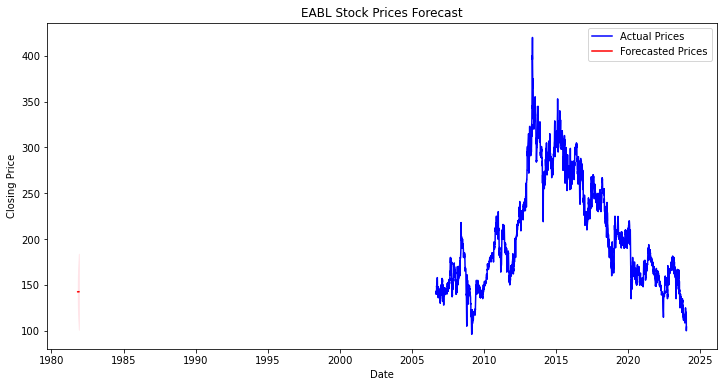

In [15]:
###
# making predictions using the trained ARIMA model:
# Forecast future values
forecast_steps = 30  # You can adjust the number of steps into the future
forecast = results.get_forecast(steps=forecast_steps)

# Extract forecasted mean and confidence intervals
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual Prices', color='blue')
plt.plot(forecast_mean, label='Forecasted Prices', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('EABL Stock Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


ValueError: x and y must have same first dimension, but have shapes (4317,) and (4348,)

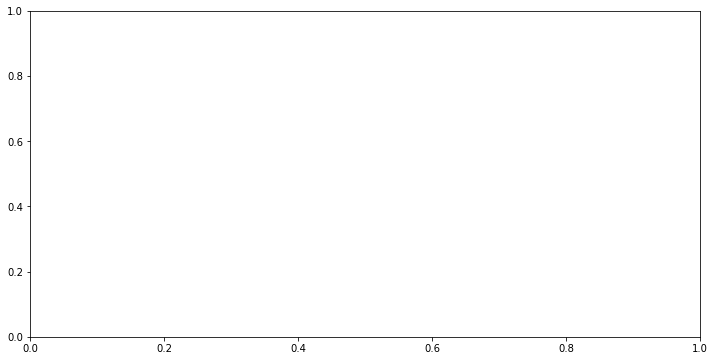

In [19]:
### Residue Analysis
# Calculate residuals
residuals = df['Close'] - forecast_mean

# Convert 'Date' to numerical values for the x-axis
date_values = pd.to_numeric(df.index[:-1])

# Plotting residuals
plt.figure(figsize=(12, 6))
plt.plot(date_values, residuals, label='Residuals', color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Line')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv('Data/Annual GDP.csv')
df.head()

In [ ]:
df = pd.read_csv('Data/Dividends-Payout.csv')
df.head()

In [ ]:
df = pd.read_csv('Data/Inflation Rates (1).csv')
df.head()
